In [1]:
# import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

%matplotlib inline

eng_stopwords = set(stopwords.words("english"))
pd.options.mode.chained_assignment = None

from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import cross_validation, metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

C:\Users\prita\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
## Read the train and test dataset and check the top few lines ##
train_df = pd.read_csv("train.csv")
#test_df = pd.read_csv("test.csv")
print("Number of rows & columns in train dataset : ",train_df.shape)
#print("Number of rows $ columns in test dataset : ",test_df.shape)

Number of rows & columns in train dataset :  (19579, 3)


In [3]:
train_df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


Exploratory Data Analysis (EDA), Feature Engineering and plots/graphs  
1.  Check class imbalance	
2.	Find length of the sentences
3.	Find Average length of the word
4.	Find Number of words
5.	Find Number of unique words
6.	Find Number of stop words
7.	Find Number of punctuations
8.	Find Number of upper case word
9.	Find Number of title case words


Count of each author
EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

Proportion of author class (%)
EAP    40.349354
MWS    30.869809
HPL    28.780837
Name: author, dtype: float64


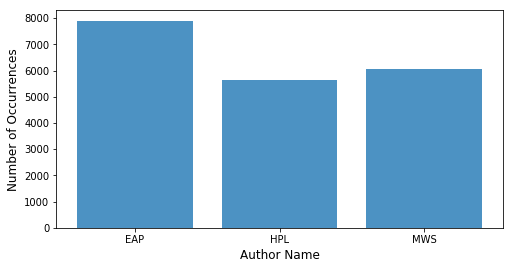

In [4]:
1. ## check class imbalance by counting number of sentences for each author and plot using barchart

print("Count of each author")
counts = train_df['author'].value_counts()
print(counts)

print("\nProportion of author class (%)")
print(train_df['author'].value_counts() / (len(train_df['author'])) * 100)   

plt.figure(figsize=(8,4))
plt.bar(counts.index, counts.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

In [5]:
## Number of characters in the text or length of the text ##
train_df["num_chars"] = train_df["text"].apply(lambda x: len(str(x)))
#test_df["num_chars"] = test_df["text"].apply(lambda x: len(str(x)))

## Average length of the words in the text ##
train_df["mean_word_len"] = train_df["text"].apply(lambda x: np.mean([len(i) for i in str(x).split()]))
#test_df["mean_word_len"] = test_df["text"].apply(lambda x: np.mean([len(i) for i in str(x).split()]))

## Number of words in the text ##
train_df["num_words"] = train_df["text"].apply(lambda x: len(str(x).split()))
#test_df["num_words"] = test_df["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train_df["unique_words"] = train_df["text"].apply(lambda x: len(pd.unique(str(x).split())))
#test_df["unique_words"] = test_df["text"].apply(lambda x: len(pd.unique(str(x).split())))

## Number of stop words in the text ##
train_df["stop_words"] = train_df["text"].apply(lambda x: len([i for i in str(x).lower().split() if i in eng_stopwords]))
#test_df["stop_words"] = test_df["text"].apply(lambda x: len([i for i in str(x).lower().split() if i in eng_stopwords]))

## Number of punctuations in the text ##
train_df["num_punctuations"] =train_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
#test_df["num_punctuations"] =test_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of upper case words in the text ##
train_df["num_words_upper"] = train_df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#test_df["num_words_upper"] = test_df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
train_df["num_words_title"] = train_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#test_df["num_words_title"] = test_df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))


In [6]:
# summary statistics of the meta features
print("\nSummary of Training Set Numeric Variables\n")
print(train_df.groupby("author").mean())



Summary of Training Set Numeric Variables

         num_chars  mean_word_len  num_words  unique_words  stop_words  \
author                                                                   
EAP     142.225949       4.644952  25.442405     21.894937   12.626456   
HPL     155.843478       4.625193  27.799645     24.437977   12.970186   
MWS     151.659828       4.598182  27.417273     23.544672   13.742224   

        num_punctuations  num_words_upper  num_words_title  
author                                                      
EAP             4.096329         0.553291         2.102405  
HPL             3.206921         0.500266         2.334694  
MWS             3.833719         0.751489         2.124255  


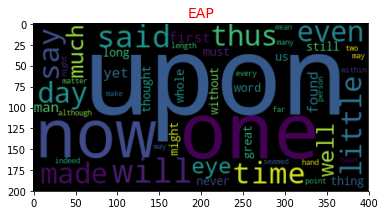

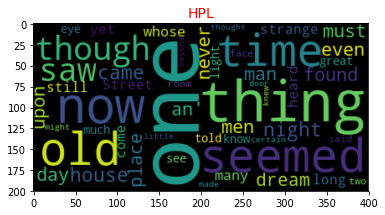

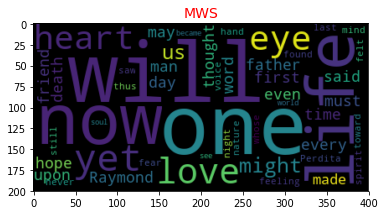

In [7]:
## Plot the Wordclouds for common words for each author ##

from wordcloud import WordCloud, STOPWORDS
eap = train_df[train_df.author=="EAP"]["text"].values
hpl = train_df[train_df.author=="HPL"]["text"].values
mws = train_df[train_df.author=="MWS"]["text"].values


## wordcloud for EAP
wc=WordCloud(max_words=50).generate(" ".join(eap))
plt.imshow(wc,interpolation='bilinear')
plt.title("EAP", fontsize=14,color='red')
plt.show()

## wordcloud for HPL
wc=WordCloud(max_words=50).generate(" ".join(hpl))
plt.imshow(wc,interpolation='bilinear')
plt.title("HPL", fontsize=14,color='red')
plt.show()

## wordcloud for MWS
wc=WordCloud(max_words=50).generate(" ".join(mws))
plt.imshow(wc,interpolation='bilinear')
plt.title("MWS", fontsize=14,color='red')
plt.show()

Natural Language Processing (NLP) with NLTK (Text Processing) 
1. Tokenization
2. Stop word removal
3. Lexical diversity, vectorizing text via term frequencies (TF) / inverse document frequencies (TF-IDF)
4. Frequence Distribution
5. Find the most common words 
6. Bar plots for common words
7. Dispersion Plots

Frequency Distribution
[('one', 542), ('said', 338), ('little', 257), ('made', 256), ('say', 255), ('time', 248), ('well', 232), ('first', 231), ('man', 225), ('found', 221), ('great', 206), ('long', 197), ('two', 194), ('every', 182), ('still', 179), ('length', 176), ('whole', 169), ('without', 165), ('eyes', 165), ('day', 162)]


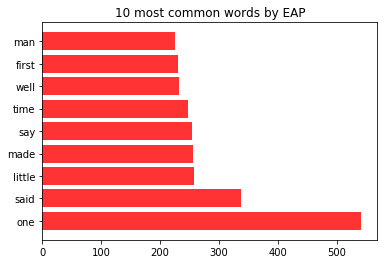

In [8]:
eap = train_df[train_df.author=="EAP"]["text"].values
hpl = train_df[train_df.author=="HPL"]["text"].values
mws = train_df[train_df.author=="MWS"]["text"].values

import matplotlib.pyplot as plt 
import string
from nltk.corpus import stopwords
filtered=[]
length_eap=[]
stopwords_fix=["could","would","upon","even","us","yet","much","however","never","must","thus","within","may","might"]
for i in eap:
    length_eap.append(len(i))
    words=nltk.word_tokenize(i)
    words1=set(words)
    stopword=set(stopwords.words('english'))
    for j in words1:
        if j.lower() not in stopword and j not in string.punctuation and j not in ("''","'s","``") and j not in stopwords_fix:
            filtered.append(j)
fdist_new=nltk.FreqDist(filtered)
d=fdist_new.most_common(20)
print("Frequency Distribution")
print(d)

value=[]
j=1
for i in range(9):
    value.append(d[i][j])
j=0
key=[]
for i in range(9):
    key.append(d[i][j])

objects = key
y_pos = np.arange(len(objects))
performance = value 
plt.barh(y_pos, performance, align='center',color='r', alpha=0.8)
plt.yticks(y_pos, objects)
plt.title("10 most common words by EAP")
plt.show()

Frequency Distribution
[('one', 410), ('old', 323), ('seemed', 269), ('like', 251), ('night', 248), ('man', 246), ('time', 229), ('saw', 229), ('though', 220), ('things', 219), ('came', 216), ('thing', 185), ('men', 183), ('found', 181), ('house', 169), ('heard', 167), ("n't", 164), ('long', 160), ('great', 158), ('whose', 158)]


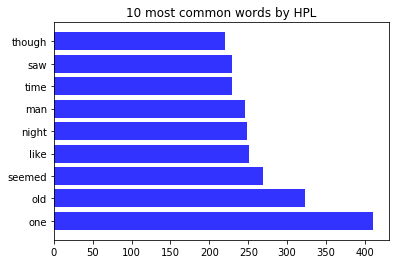

In [9]:
filtered1=[]
length_hpl=[]
for i in hpl:
    length_hpl.append(len(i))
    words=nltk.word_tokenize(i)
    words1=set(words)
    stopword=set(stopwords.words('english'))
    for j in words1:
        if j.lower() not in stopword and j not in string.punctuation and j not in ("''","'s","``") and j not in stopwords_fix:
            filtered1.append(j)
fdist_new=nltk.FreqDist(filtered1)
d=fdist_new.most_common(20)
print("Frequency Distribution")
print(d)

value=[]
j=1
for i in range(9):
    value.append(d[i][j])
j=0
key=[]
for i in range(9):
    key.append(d[i][j])

objects = key
y_pos = np.arange(len(objects))
performance = value 
plt.barh(y_pos, performance, align='center',color='b', alpha=0.8)
plt.yticks(y_pos, objects)
plt.title("10 most common words by HPL")
plt.show()

Frequency Distribution
[('one', 384), ('life', 309), ('Raymond', 265), ('heart', 259), ('love', 245), ('eyes', 231), ('time', 223), ('man', 219), ('said', 206), ('every', 202), ('father', 202), ('first', 200), ('day', 189), ('death', 177), ('ever', 164), ('made', 164), ('Perdita', 164), ('like', 154), ('mind', 154), ('night', 152)]


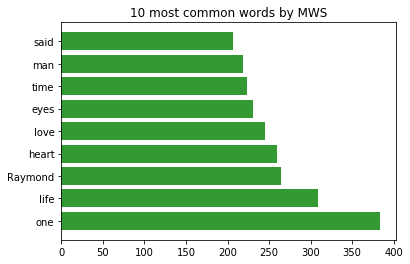

In [10]:
filtered2=[]
length_mws=[]
for i in mws:
    length_mws.append(len(i))
    words=nltk.word_tokenize(i)
    words1=set(words)
    stopword=set(stopwords.words('english'))
    for j in words1:
        if j.lower() not in stopword and j not in string.punctuation and j not in ("''","'s","``") and j not in stopwords_fix:
            filtered2.append(j)
fdist_new=nltk.FreqDist(filtered2)
d=fdist_new.most_common(20)
print("Frequency Distribution")
print(d)

value=[]
j=1
for i in range(9):
    value.append(d[i][j])
j=0
key=[]
for i in range(9):
    key.append(d[i][j])

objects = key
y_pos = np.arange(len(objects))
performance = value 
plt.barh(y_pos, performance, align='center',color='g', alpha=0.8)
plt.yticks(y_pos, objects)
plt.title("10 most common words by MWS")
plt.show()

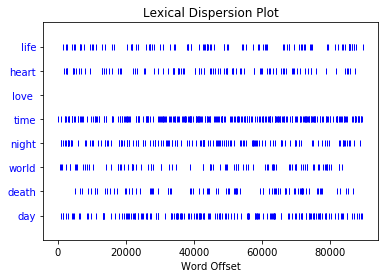

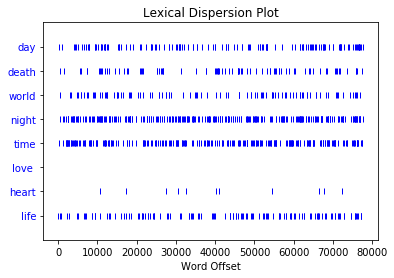

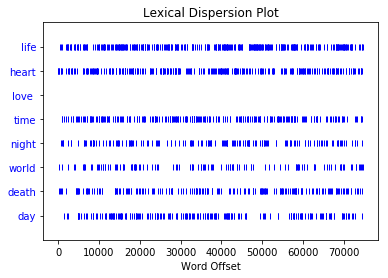

In [11]:
# Dispersion Plot
from nltk.draw.dispersion import dispersion_plot
from nltk.corpus import inaugural

tags=['life','heart','love ','time','night','world', 'death','day']
dispersion_plot(filtered,tags)
dispersion_plot(filtered1,tags)
dispersion_plot(filtered2,tags)

In [12]:
seed = 10

encoder = LabelEncoder()
encoder.fit(train_df['author'])
train_y1 = encoder.transform(train_df['author'])
train_y = pd.DataFrame(train_y1)

#print("Few rows from dataset")
#print(train_y)

#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(train_df, train_y, test_size = 0.25, random_state = seed)

print("\n\nSize of Training Dataset - features")
print(X_train.shape)                                                           ## count for X_train
print("\nSize of Testing Dataset - features")
print(X_test.shape)                                                            ## count for X_test

print("\nSize of Target - train")
print(y_train.size)                                                  ## count
print("\nSize of Target - test")
print(y_test.size) 

print("\nProportion of Author - train")
print(y_train[0].value_counts() / (len(y_train)) * 100)                                     ## proportion
print("\nProportion of Author - test")
print(y_test[0].value_counts() / (len(y_test)) * 100)



Size of Training Dataset - features
(14684, 11)

Size of Testing Dataset - features
(4895, 11)

Size of Target - train
14684

Size of Target - test
4895

Proportion of Author - train
0    40.663307
2    30.788613
1    28.548080
Name: 0, dtype: float64

Proportion of Author - test
0    39.407559
2    31.113381
1    29.479060
Name: 0, dtype: float64


In [13]:
#Naive Bayes on word count Tfidf Vectorizer
train_tfidf = X_train['text'].values.tolist()
test_tfidf = X_test['text'].values.tolist()

#Naive Bayes on word count Tfidf Vectorizer
NBclassifier = Pipeline([('vect', CountVectorizer(analyzer='word')),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
])
NBclassifier.fit(train_tfidf, y_train)

#Predict training set:
train_predictions = NBclassifier.predict_proba(train_tfidf)
train_pred_class = NBclassifier.predict(train_tfidf)

#Predict testing set:
test_predictions = NBclassifier.predict_proba(test_tfidf)
test_pred_class = NBclassifier.predict(test_tfidf)

#Perform cross-validation:
cv_score_train = cross_validation.cross_val_score(NBclassifier, train_tfidf, y_train[0].values, cv=5,scoring='accuracy')  
print("\nCross-validation Results - Train Data Accuracy %")
print("Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score_train),np.std(cv_score_train),np.min(cv_score_train),np.max(cv_score_train)))
print("\nTrain Data Confusion matrix\n", metrics.confusion_matrix(y_train, train_pred_class))

cv_score_test = cross_validation.cross_val_score(NBclassifier, test_tfidf, y_test[0], cv=5,scoring='accuracy')  
print("\nCross-validation Results - Test Data Accuracy %")
print("Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score_test),np.std(cv_score_test),np.min(cv_score_test),np.max(cv_score_test)))
print("\nTest Data Confusion matrix\n", metrics.confusion_matrix(y_test, test_pred_class))

print("\nAccuracy on Test Data %: ")
print(accuracy_score(y_test[0], test_pred_class)*100)


Cross-validation Results - Train Data Accuracy %
Mean - 0.7916103 | Std - 0.004602366 | Min - 0.7867847 | Max - 0.7994552
Train Data Confusion matrix
 [[5785   31  155]
 [ 677 3378  137]
 [ 475   34 4012]]

Cross-validation Results - Test Data Accuracy %
Mean - 0.7301315 | Std - 0.007274162 | Min - 0.7198364 | Max - 0.7408163
Test Data Confusion matrix
 [[1806   28   95]
 [ 467  881   95]
 [ 294   22 1207]]

Accuracy on Test Data %: 
79.5505617977528


In [14]:
import xgboost as xgb
from xgboost import XGBClassifier

cols_to_drop = ['id', 'text','author']
train_X = X_train.drop(cols_to_drop, axis=1)
test_X = X_test.drop(cols_to_drop, axis=1)

xgb_classifier = XGBClassifier(learning_rate =0.9, n_estimators=15, max_depth=8, min_child_weight=12, gamma=0,
        subsample=0.8, colsample_bytree=0.8, objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)
   
#Fit the algorithm on the data  
xgb_classifier.fit(train_X, y_train[0].values)
        
#Predict training set:
train_predictions = xgb_classifier.predict(train_X)
    
#Predict testing set:
test_predictions = xgb_classifier.predict(test_X)


#Perform cross-validation:
cv_score_train = cross_validation.cross_val_score(xgb_classifier, train_X, y_train[0], cv=5,scoring='accuracy')  
print("\nCross-validation Results - Train Data Accuracy %")
print("Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score_train),np.std(cv_score_train),np.min(cv_score_train),np.max(cv_score_train)))
print("\nTrain Data Confusion matrix\n", metrics.confusion_matrix(y_train[0].values, train_predictions))

cv_score_test = cross_validation.cross_val_score(xgb_classifier, test_X, y_test[0].values, cv=5,scoring='accuracy')  
print("\nCross-validation Results - Test Data Accuracy %")
print("Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score_test),np.std(cv_score_test),np.min(cv_score_test),np.max(cv_score_test)))
print("\nTest Data Confusion matrix\n", metrics.confusion_matrix(y_test, test_predictions))

print("\nAccuracy on Test Data %: ")
print(accuracy_score(y_test[0], test_predictions)*100)


Cross-validation Results - Train Data Accuracy %
Mean - 0.477187 | Std - 0.00697305 | Min - 0.4676431 | Max - 0.4850136

Train Data Confusion matrix
 [[4528  694  749]
 [1001 2629  562]
 [1721  712 2088]]

Cross-validation Results - Test Data Accuracy %
Mean - 0.4843707 | Std - 0.01276137 | Min - 0.4663265 | Max - 0.5061224

Test Data Confusion matrix
 [[1180  291  458]
 [ 450  744  249]
 [ 811  269  443]]

Accuracy on Test Data %: 
48.35546475995914


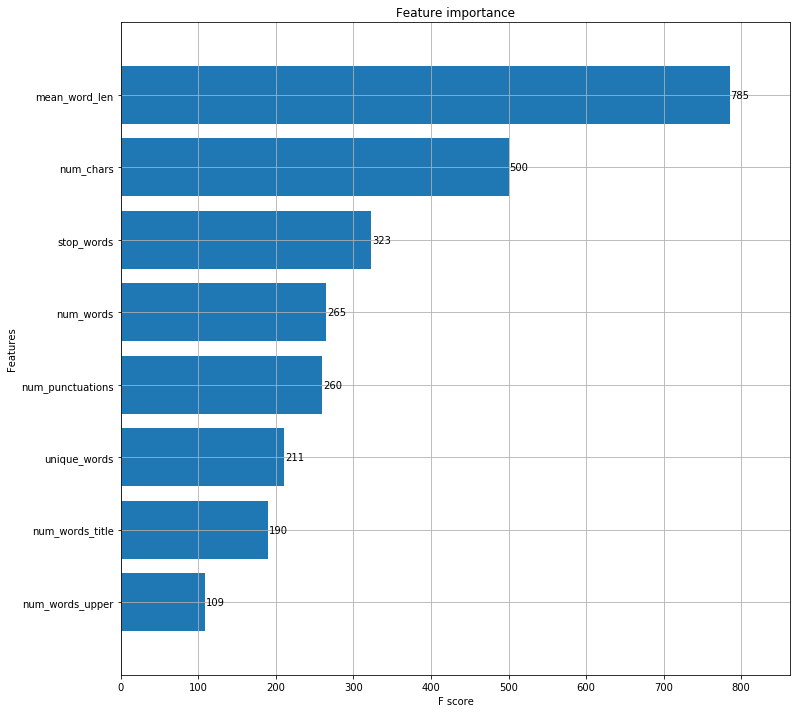

In [15]:
### Plot the important variables ###
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_importance(xgb_classifier, max_num_features=50, height=0.8, ax=ax)
plt.show()

# STILL WORKING ON BELOW CODE

Text(0.5,0.98,'Length of Sentences')

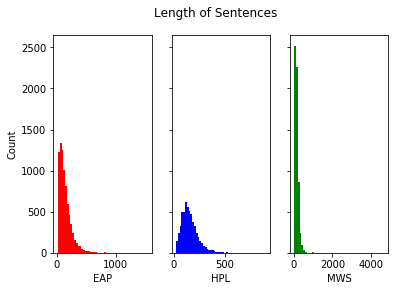

In [16]:

#Working on it
import pandas as pd
import matplotlib.pyplot as plt
x = length_eap
y = length_hpl
z = length_mws
num_bins1 = 50
# Two subplots, unpack the axes array immediately
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharey=True)
ax1.hist(x, num_bins1, color='r')
ax2.hist(y, num_bins1, color='b')
ax3.hist(z, num_bins1, color='g')
ax1.set_xlabel('EAP')
ax1.set_ylabel('Count')
ax2.set_xlabel('HPL')
ax3.set_xlabel('MWS')
fig.suptitle('Length of Sentences')

In [17]:
import pandas as pd
obj=pd.Series(x)
obj1=pd.Series(y)
obj2=pd.Series(z)

In [18]:
# Description of length of text of each Author
print("EAP")
print(obj.describe())
print("\nHPL\n")
print(obj1.describe())
print("\nMWS\n")
print(obj2.describe())

EAP
count    7900.000000
mean      142.225949
std       105.751334
min        21.000000
25%        68.000000
50%       115.000000
75%       186.000000
max      1533.000000
dtype: float64

HPL

count    5635.000000
mean      155.843478
std        82.020647
min        21.000000
25%        98.000000
50%       142.000000
75%       196.500000
max       900.000000
dtype: float64

MWS

count    6044.000000
mean      151.659828
std       126.305008
min        21.000000
25%        84.000000
50%       130.000000
75%       192.000000
max      4663.000000
dtype: float64
